Describe a QPE procedure to find $ \theta $ when $ U |\psi\rangle = e^{2\pi i \theta} |\psi \rangle $


In [353]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_histogram
from IPython.display import display, Latex
from math import pi
import math
from qiskit.circuit.library import QFT, CUGate
from qiskit.circuit.library import UGate

import numpy as np

Lets take the example of U as pauli X opearator. 

In [354]:
def IQFT(no_of_Qubits):
    qc = QuantumCircuit(no_of_Qubits, name="myIQFT")
    
        
    for q in range(no_of_Qubits-1, -1, -1):
        for i in range(no_of_Qubits-1, q, -1):
            qc.cp(-pi/(2**(i-q)), i, q)
        qc.h(q)
        
    qc.to_gate()
    return qc
        

In [355]:
Precision = 3

QREG = QuantumRegister(Precision+1)
CREG = ClassicalRegister(Precision)

QC = QuantumCircuit(QREG, CREG)
QC.x(Precision)
QC.barrier()

angle = 3*pi/8

for i in range(Precision):
    QC.h(i)

for i in range(Precision):
    for t in range(2**(i)):
        QC.cp(angle, Precision-i-1, Precision)

myIQfT = IQFT(Precision)
# QC.append(myIQfT, range(Precision))
QC.append(QFT(Precision, 0, inverse=True, do_swaps=False), range(Precision) )
state = Statevector(QC)
state.draw(output="latex")


<IPython.core.display.Latex object>

In [356]:
QC.measure(range(Precision),range(Precision))
QC.draw(scale=0.5, fold=1000)

░ ┌───┐                                                                      ┌───────┐┌─┐      
q441_0: ──────░─┤ H ├───────────────────────────────■─────────■─────────■─────────■────────┤0      ├┤M├──────
              ░ ├───┤                               │         │         │         │        │       │└╥┘┌─┐   
q441_1: ──────░─┤ H ├───────────■─────────■─────────┼─────────┼─────────┼─────────┼────────┤1 IQFT ├─╫─┤M├───
              ░ ├───┤           │         │         │         │         │         │        │       │ ║ └╥┘┌─┐
q441_2: ──────░─┤ H ├─■─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────┤2      ├─╫──╫─┤M├
        ┌───┐ ░ └───┘ │P(3π/8)  │P(3π/8)  │P(3π/8)  │P(3π/8)  │P(3π/8)  │P(3π/8)  │P(3π/8) └───────┘ ║  ║ └╥┘
q441_3: ┤ X ├─░───────■─────────■─────────■─────────■─────────■─────────■─────────■──────────────────╫──╫──╫─
        └───┘ ░                                                                                      ║  ║  ║ 
 c64: 3/═════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                     0  1  2

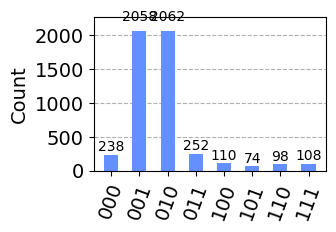

In [357]:
backend = Aer.get_backend('aer_simulator_statevector') 
QC.save_statevector()  
result = backend.run(transpile(QC, backend), shots=5000).result()
out_state = result.get_statevector()
plot_histogram(result.get_counts(), figsize=(3,2))

In [365]:
def convertBinaryToDecimal(str):
    str = list(str)
    o = 0 
    multiplication_factor = 2
    while str:
        if int(str.pop(0)): 
            o += 1/multiplication_factor
        multiplication_factor *= 2
    return o


0.1875
66.66666666666667
133.33333333333334
200.0
333.3333333333333
